<h1><center> Titanic Survivors </center></h1>

<img src='img/titanic2.jpg' >

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this notebook, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Preprocessing of data
- Import necessary packages required
- Read the required CSV
- how the head of the csv Dataframe
- Look at the info of the Dataframe 
- Look to see if there are ny null values
- Replace the space input on the Total Charges and change the dtype
- LabelEncode all the categorical data 
- Create new Dataframe with dropped old columns and new columns 
- Split the data into x(the features ) and y(the dependent) 
- Split the data into training and test sets
- See the statistics of the dataset

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 


In [2]:
train = pd.read_csv('CSV/train.csv')
test = pd.read_csv('CSV/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


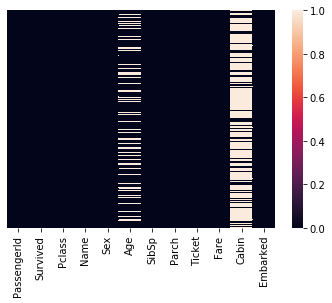

In [5]:
sns.heatmap(train.isnull(),yticklabels=False)

We can see that Cabin has a high number of null value so does Age . So decide to drop cabin .

In [6]:
train.drop('Cabin',inplace=True,axis=1)

# EDA(Exploratory Data Analysis)
- Visualize the data to see relationships between people who survived and those who didnt.
- People who survived and didnt survived
- Sex who survived and didnt survived 
- Distribution of age of those who survived and didnt churn
- See if the class they are in are more likely to survive or not 

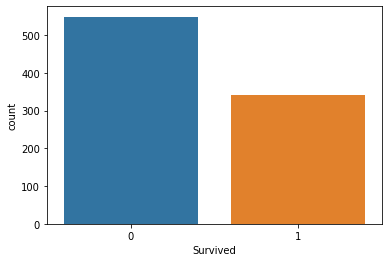

In [7]:
sns.countplot(x='Survived',data=train)

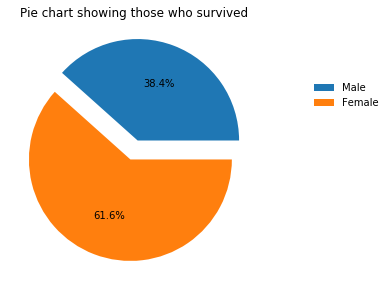

In [8]:
lived = train[train['Survived']==1]
dead = train[train['Survived']==0]
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
xx = len(lived) 
yy = len(dead) 

plt.title('Pie chart showing those who survived')
plt.pie([xx ,yy], explode=(0.1,0.1),autopct='%1.1f%%')
plt.legend(['Male', 'Female'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()


<h4>Survived Individuals</h4>
<blockquote>
    We can see that even though we havent watched the movie that more people have died in this horiffic acident than those who have lived. Which explains why people are still taken aback by this . We will try see other contributing factors in the likelyness for one to have survived
</blockquote>

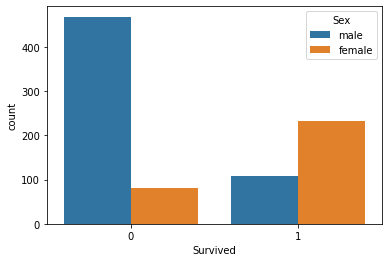

In [9]:
sns.countplot(x='Survived',hue='Sex',data=train)

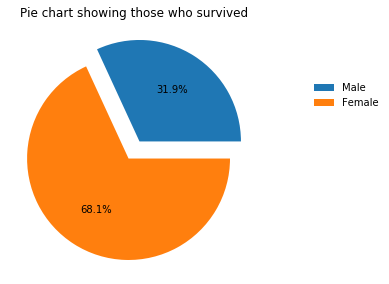

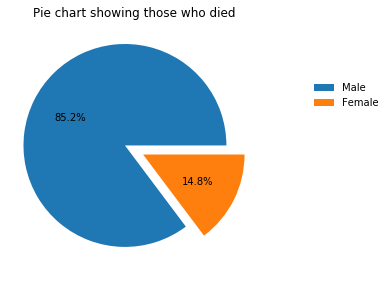

In [10]:
lived = train[train['Survived']==1]
dead = train[train['Survived']==0]
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
xx = len(lived[lived.Sex  == 'male']) 
yy = len(lived[lived.Sex  == 'female']) 

plt.title('Pie chart showing those who survived')
plt.pie([xx ,yy], explode=(0.1,0.1),autopct='%1.1f%%')
plt.legend(['Male', 'Female'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
xx = len(dead[dead.Sex  == 'male']) 
yy = len(dead[dead.Sex  == 'female']) 

plt.title('Pie chart showing those who died')
plt.pie([xx ,yy], explode=(0.1,0.1),autopct='%1.1f%%')
plt.legend(['Male', 'Female'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<h4>Rate of survival and death of people per Sex</h4>
<blockquote>
More males are dying than females , this could be because in an emergency the main call is "Women and children first" . Women are seen as more valuable than men as they are the child bearers . Which children are the future so its a form of self preservation by Man. Also its more valiant for a man to be seen as the savior . So men dying more is supposed to be seen in the graphs.
</blockquote>

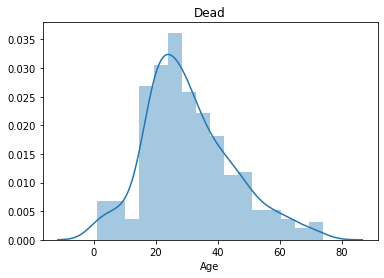

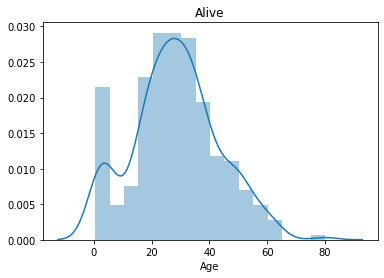

In [11]:
for x in [0,1]:
    survived = train[train.Survived == x]
    sns.distplot(survived['Age'].dropna())
    if x == 0:
        plt.title('Dead')
    else:
        plt.title('Alive')
    plt.show()

<h4>Rate of survival and death of people per ages</h4>
<blockquote>
As we can see that where someone age on the titanic doesnt really give us a good trend as the same trend applies in those who lived.
</blockquote>

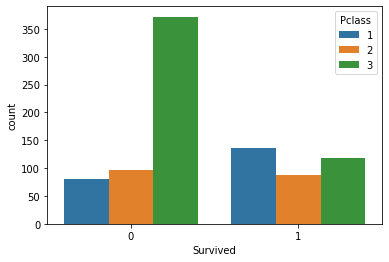

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<h4>Rate of survival and death of people per class</h4>
<blockquote>
As we can see that the people who died the most come from the 3rd class that could be because the 3rd class is the most heavily populated class as its the cheapest. And if they were all the same size it would remove the novelty of first class. Also first class had the lowest number of deaths and highest number of people who survived which shows that the class counts for you likelyhood of surviving .
</blockquote>

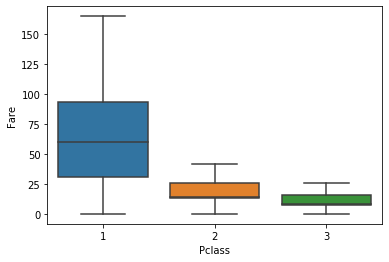

In [13]:
sns.boxplot(x='Pclass',y='Fare',data=train,showfliers=False)

<h4>Fare of people per class</h4>
<blockquote>
As we can see that first class is the most expensive which explains the ages of the people who purchase them .  
</blockquote>

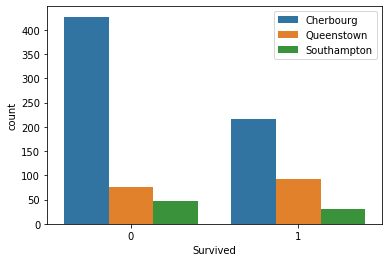

In [14]:
sns.countplot(x='Survived',hue='Embarked',data=train)
plt.legend(['Cherbourg','Queenstown','Southampton'])

<h4>Rate of survival and death of people per class</h4>
<blockquote>
As we can see that where someone embarks on the titanic doesnt really give us a good trend as the same trend applies in those who lived.
</blockquote>

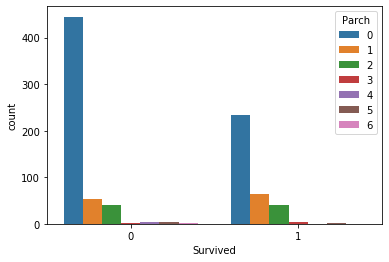

In [15]:
sns.countplot(x='Survived',hue='Parch',data=train)

<h4>Rate of survival and death of people per Number of Parents</h4>
<blockquote>
As we can see that where someone Number of Parents on the titanic doesnt really give us a good trend as the same trend applies in those who lived.
</blockquote>

## Observations so far:
- Our data is split with 60 percent non churn
- Our data has a 40 perecent survival rate
- Females are more likely to live than males
- Males are less likely to live 
- If you are in first class you are more likely to live unlike third class where you are more lily to die  
- The rest show the same trend so its an artifact
SPOILER ALERT !!!


With this we can see why Jack , the third class , male died in the movie. And Rose the first class female lived.

<img src='img/jack2.jpg' width='500px' height='500px'>

# Imputing the age 
- Use heatmap to see if age is still null
- Look for ways/relationships between age andthe pclass to impute
- Create function to impute 

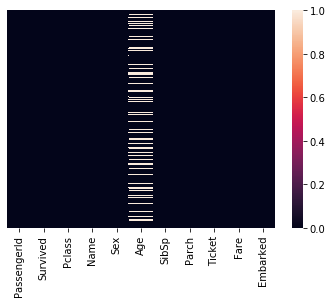

In [16]:
sns.heatmap(train.isnull(),yticklabels=False)

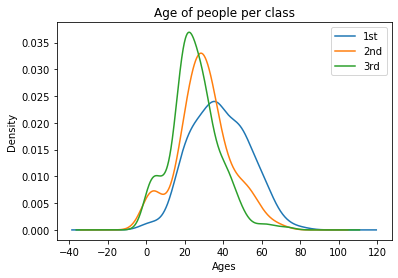

In [17]:
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind='kde')
plt.title('Age of people per class')
plt.legend(('1st','2nd','3rd'))
plt.xlabel('Ages')
plt.show()

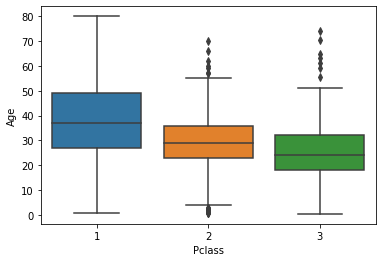

In [18]:
sns.boxplot(x='Pclass',y='Age',data=train)

<h4>Age of people per class</h4>
<blockquote>
The ages of the 3rd class are faily young then the second class then the oldest being the 1st class we can contribute this to first class being expensive . And the older you are the more likely you are to have acquired more money and thus can splurge on a first class ticket. The yopunger you are you are more liekly to be concerned about getting to the destination hence you can buty the cheapest ticket .As we can observe the ages of the different classes can tell us important information when we impute .
</blockquote>

## Imputing Function

In [19]:
def ageChange(cols):
    if pd.isnull(cols[0]):
        qwe = train[train.Pclass == cols[1]]
        mean = qwe['Age'].mean() 
        return mean
    else:
        return cols[0]

In [20]:
train['Age'] = train[['Age','Pclass']].apply(ageChange,axis=1)

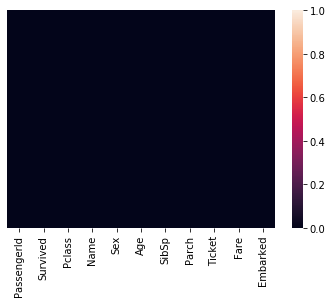

In [21]:
sns.heatmap(train.isnull(),yticklabels=False)

#### Getting the dummy variables for embarked and sex 

In [22]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first=True)

train.drop(['Sex','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embarked],axis=1)

In [23]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Split the data into training and test set 

In [24]:
x =  train.drop('Survived',axis=1)
y = train['Survived']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)

## Here we make our Model
- We use the DecisionTreeClassifier model
- We will fit it
- We predict using all of them using training and test data to see if they good at knowing trained data or new data
- Actual Decision Tree
- ROC Curve

In [25]:
lr_train_split = LogisticRegression(solver='lbfgs')
lr_train_split.fit(x_train, y_train)

/home/recruit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions

In [26]:
y_pred = lr_train_split.predict(x_test)

In [27]:
print(f'Score of the classification model on test set = {lr_train_split.score(x_test, y_test)}')

Score of the classification model on test set = 0.8044692737430168


## Confusion Matrix 

In [28]:
print(confusion_matrix(y_test,y_pred))
positive,negative = confusion_matrix(y_test,y_pred)
TP,FP = positive
FN,TN = negative
print(f'TP True positive = {TP}')
print(f'FP False positive = {FP}')
print(f'FN False negative = {FN}')
print(f'TN True negative = {TN}')

[[92 14]
 [21 52]]
TP True positive = 92
FP False positive = 14
FN False negative = 21
TN True negative = 52


- TP True positive for correctly predicted event values.
- FP False positive for incorrectly predicted event values.
- TN True negative for correctly predicted no-event values.
- FN False negative for incorrectly predicted no-event values.

## Classification Report 

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       106
           1       0.79      0.71      0.75        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Precision - Precision is the ability of a classiifer not to label an instance positive that is actually negative.

Precision = TP/(TP + FP)

Recall - Recall is the ability of a classifier to find all positive instances.

Recall = TP/(TP+FN)

F1 Score - The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

## ROC Curve Graph

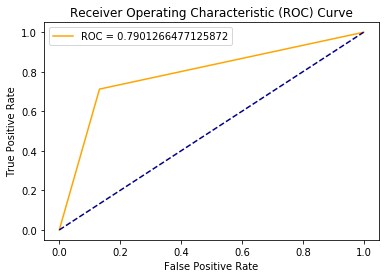

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label=f'ROC = {roc_auc}')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [31]:
target = train['Survived'].values
feature_names = ['Pclass','Age','Fare','SibSp','Parch']
features = train[feature_names].values

#make model
from sklearn import model_selection

scores = model_selection.cross_val_score(lr_train_split,features,target,scoring='accuracy',cv=50)
print(scores)
print(f'this is the mean {scores.mean()}')

[0.77777778 0.44444444 0.72222222 0.66666667 0.55555556 0.72222222
 0.5        0.55555556 0.72222222 0.72222222 0.72222222 0.72222222
 0.83333333 0.66666667 0.61111111 0.66666667 0.77777778 0.72222222
 0.66666667 0.61111111 0.66666667 0.83333333 0.72222222 0.72222222
 0.66666667 0.77777778 0.72222222 0.83333333 0.61111111 0.77777778
 0.66666667 0.66666667 0.72222222 0.66666667 0.88888889 0.77777778
 0.55555556 0.72222222 0.72222222 0.77777778 0.72222222 0.66666667
 0.70588235 0.70588235 0.64705882 0.76470588 0.76470588 0.76470588
 0.64705882 0.875     ]
this is the mean 0.7030555555555555
